In [4]:
import os, json, re, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def convertSex(sex) :
    if (sex == 0) :
        return 'female'
    else :
        return 'male'

In [6]:
def convertAgeRange(age) :
    if (10 <= age < 20) :
        return '10s'
    elif (20 <= age < 30) :
        return '20s'
    elif (30 <= age < 40) :
        return '30s'
    elif (40 <= age < 50) :
        return '40s'
    elif (50 <= age < 60) :
        return '50s'
    else :
        return '60s over'

In [5]:
def isHangul(text):
    #Check the Python Version
    pyVer3 = sys.version_info >= (3, 0)

    if pyVer3 : # for Ver 3 or later
        encText = text
    else: # for Ver 2.x
        if type(text) is not unicode:
            encText = text.decode('utf-8')
        else:
            encText = text

    hanCount = len(re.findall(u'[\u3130-\u318F\uAC00-\uD7A3]+', encText))
    return hanCount > 0

In [23]:
word_dict_list = []
file_location = ['./Paper_Label/female/', './Paper_Label/male/']

for location in file_location :
    for label_file in os.listdir(location):
        with open(location+label_file) as f:
            info_json = json.load(f)

            for idx, word in enumerate(info_json['bbox']):
                if isHangul(word['data']) and 2 <= len(word['data']) <= 4:

                    word_dict_list.append({
                        'origin_file': label_file,
                        'sex': convertSex(info_json['Images']['writer_sex']),
                        'age': info_json['Images']['writer_age'],
                        'age_range': convertAgeRange(info_json['Images']['writer_age']),
                        'word': word['data'],
                        'word_len': len(word['data']),
                    })
        
df = pd.DataFrame(word_dict_list)

In [24]:
df

,origin_file,sex,age,age_range,word,word_len
0,IMG_OCR_53_4PR_09305.json,female,41,40s,강원도,3
1,IMG_OCR_53_4PR_09305.json,female,41,40s,경상북도,4
2,IMG_OCR_53_4PR_09305.json,female,41,40s,경기도,3
3,IMG_OCR_53_4PR_09305.json,female,41,40s,인제군,3
4,IMG_OCR_53_4PR_09305.json,female,41,40s,영광군,3
...,...,...,...,...,...,...
462888,IMG_OCR_53_4PR_99941.json,male,22,20s,서운면,3
462889,IMG_OCR_53_4PR_99941.json,male,22,20s,복세편살,4
462890,IMG_OCR_53_4PR_99941.json,male,22,20s,버카충,3
462891,IMG_OCR_53_4PR_99941.json,male,22,20s,별다줄,3


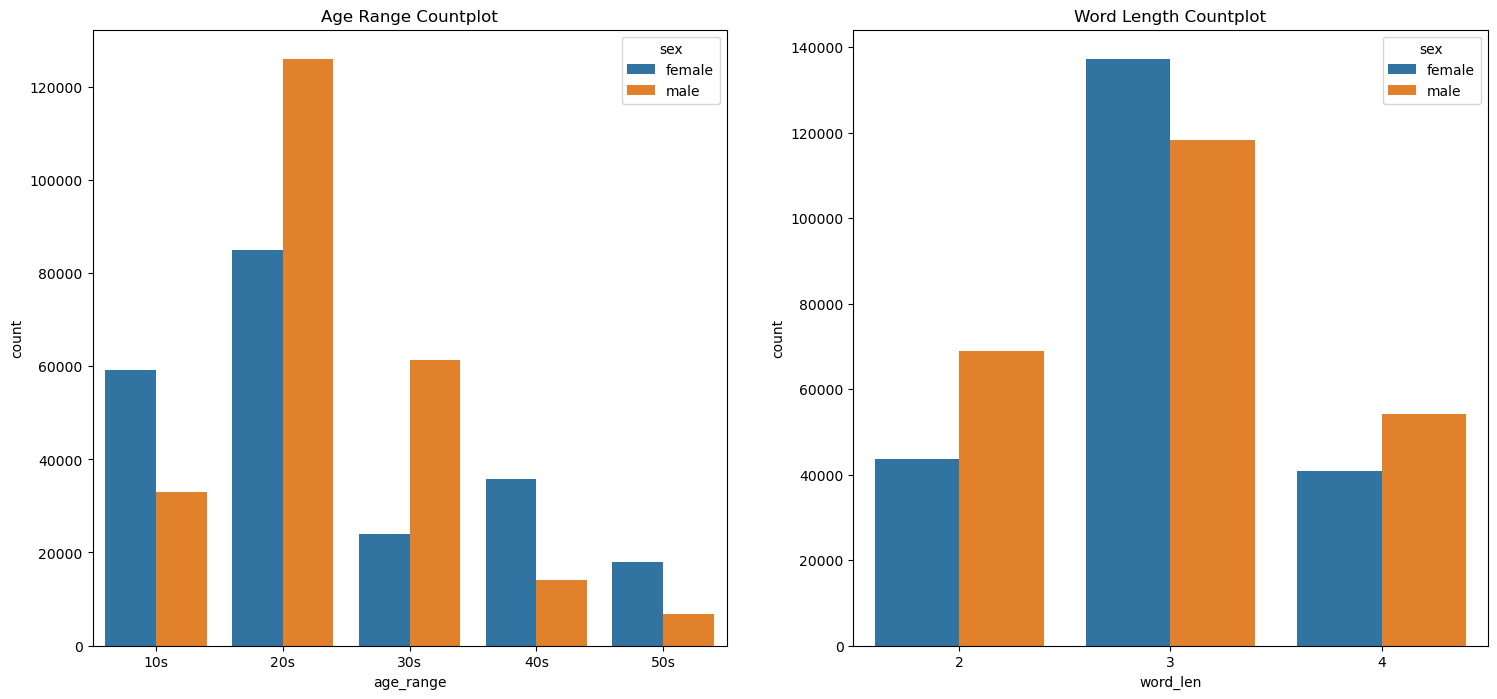

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(df, x='age_range', hue='sex', order=['10s', '20s', '30s', '40s', '50s'], ax=ax[0])
ax[0].set_title('Age Range Countplot')

sns.countplot(df, x='word_len', hue='sex', ax=ax[1])
ax[1].set_title('Word Length Countplot')

plt.show()

Text(0.5, 1.0, 'word length by age')

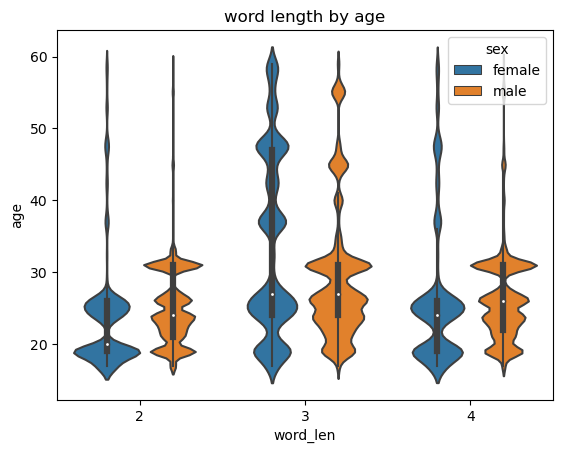

In [30]:
sns.violinplot(df, x='word_len', y='age', hue='sex')
plt.title('word length by age')

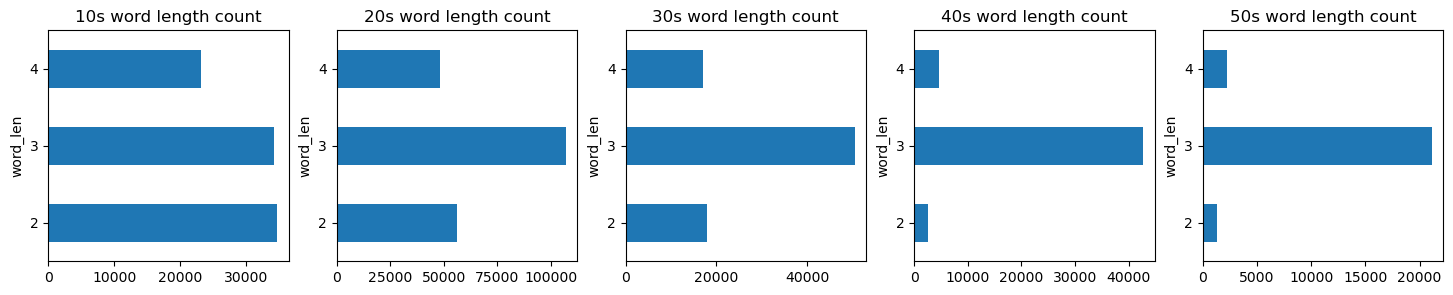

In [39]:
age_range = ['10s', '20s', '30s', '40s', '50s']

f, ax = plt.subplots(1, 5, figsize=(18, 3))
for i, my_age_range in enumerate(age_range):
    df[df['age_range'] == my_age_range].value_counts('word_len').sort_index().plot(kind='barh', ax=ax[i])
    ax[i].set_title(my_age_range+' word length count')
plt.show()